In [1]:
from mlpipeline_analyzer import PipelineDiagram
from sklearn.svm import SVC
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.discriminant_analysis import *
from sklearn.impute import *
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import numpy as np
import joblib
#import pickle

"""
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

"""

def custom_function(set=1):
    s = 'Hello ' * set
    return

model = SVC(C=1.0, kernel='poly', degree=5, gamma='scale')
sklearn_pipeline = Pipeline([('custom', custom_function(set=10)), #-- Pipe Transformer 1
                     ("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')), #-- Pipe Transformer 2
                     ('scale', FeatureUnion([
                ('minmax', MinMaxScaler()),    #-- Parallel Transformer 3
                ('standardscaler', StandardScaler()),  #-- Parallel Transformer 4
                ('normalize', Normalizer())])),#-- Parallel Transformer 5
                     ('feature_select', RFE(estimator = model, n_features_to_select=1)), #-- Pipe Transformer 6
                     ('PCA', PCA(n_components=1)), #-- Pipe Transformer 7
            ("LDA", LinearDiscriminantAnalysis()), #-- Pipe Transformer 8
            #('classifier', model), 	      #-- Pipe Classifier/Predictor 9
('voting', RandomForestClassifier(n_estimators=10))]) 	      #-- Pipe Classifier/Predictor 10

joblib.dump(sklearn_pipeline , 'examples/sample_models/ml_pipeline.pkl')

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


['examples/sample_models/ml_pipeline.pkl']

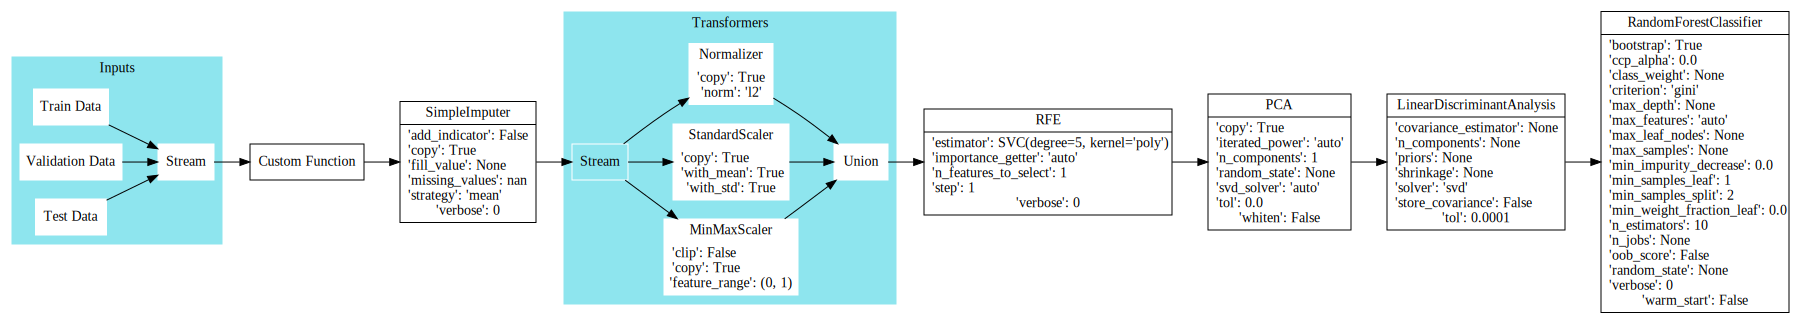

In [5]:
from mlpipeline_analyzer import PipelineDiagram
import joblib
sklearn_pipeline = joblib.load('examples/sample_models/ml_pipeline.pkl')
a = PipelineDiagram(sklearn_pipeline)
a.show(title='Sklearn ML Pipeline Diagram')
a.show_params(title='Sklearn Machine Learning Parameters Pipeline')

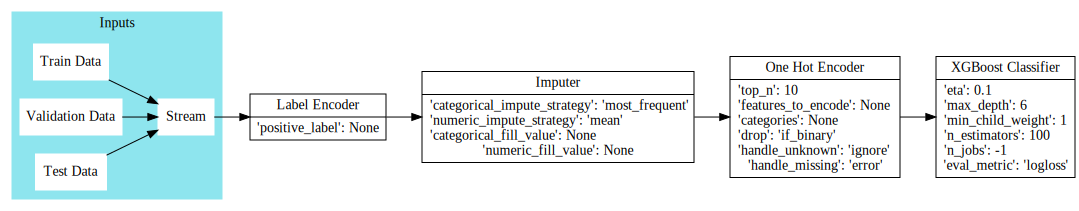

In [7]:
evalml_pipeline = joblib.load('examples/sample_models/automl_pipeline.pkl')
b = PipelineDiagram(evalml_pipeline)
b.show(title='Evalml ML Pipeline Diagram')
b.show_params(title='Evalml Machine Learning Parameters Pipeline')

         Number of Features
Numeric                  30

Number of training examples: 569
Targets
benign       62.74%
malignant    37.26%
Name: target, dtype: object


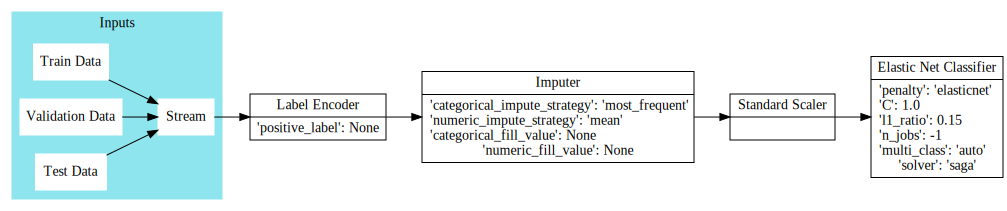

In [4]:
from evalml.automl import AutoMLSearch
import evalml
X, y = evalml.demos.load_breast_cancer()
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary')
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()
pipeline = automl.best_pipeline
a = PipelineDiagram(pipeline)
a.show()
a.show_params()

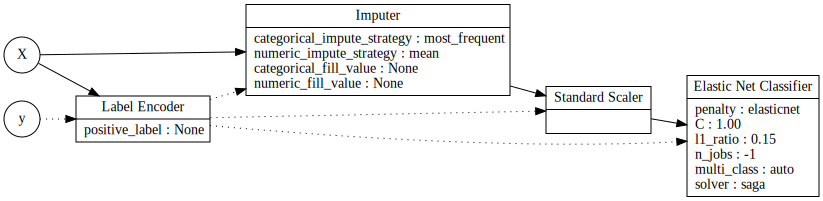

In [5]:
pipeline.graph()

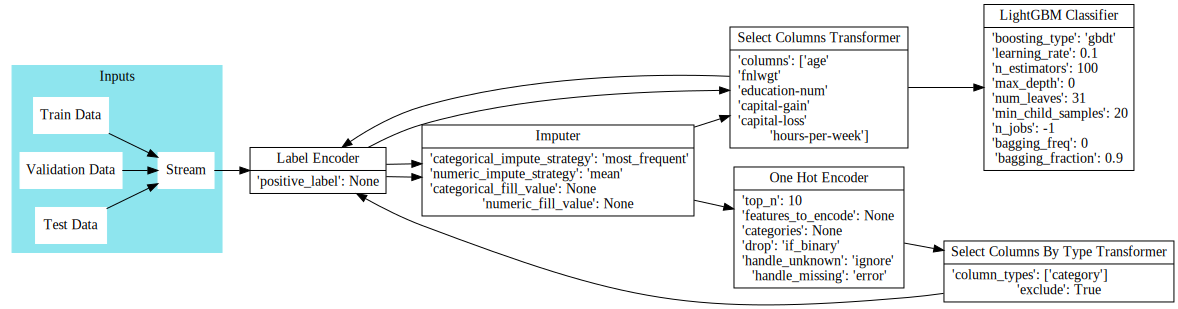

In [7]:
income_pipeline = joblib.load('examples/sample_models/ml_pipeline_income_classification.pkl')
income_pipeline.graph()
c = PipelineDiagram(income_pipeline)
c.show(title='Evalml ML Pipeline Diagram')
c.show_params(title='Evalml Machine Learning Parameters Pipeline')

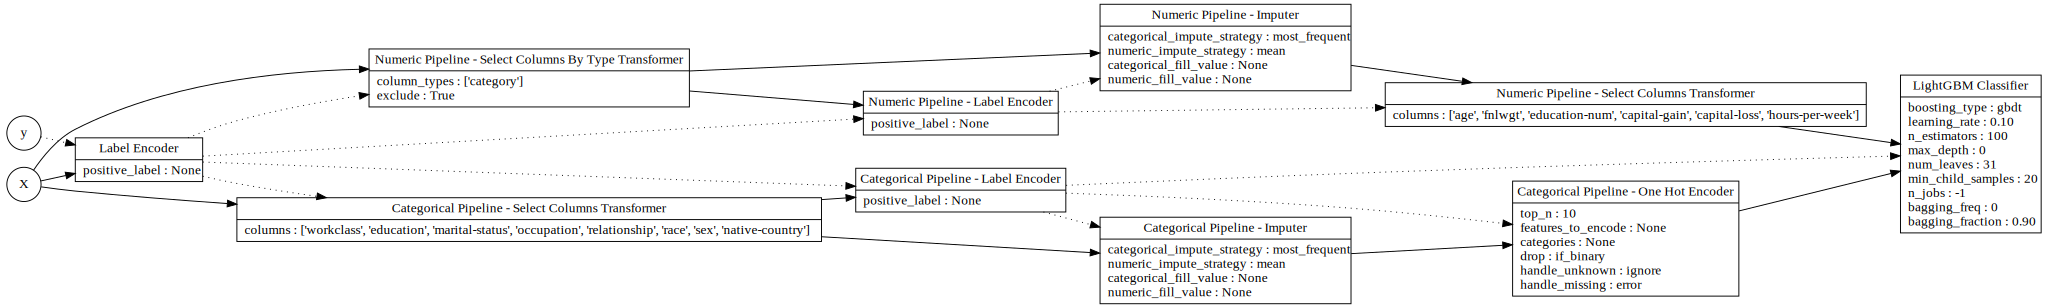

In [8]:
income_pipeline.graph()